In [54]:
import math
import numpy as np
import cmath 

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image  
 
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (12, 5),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)

def dB(a):
    return 20*np.log10(a)

In [55]:
wo = 100e6
y11 = 1.34e-3 *(np.cos(84.9/180.*np.pi)+1j*np.sin(84.9/180.*np.pi))
y12 =  260e-6 *(np.cos(-90/180.*np.pi)+1j*np.sin(-90/180.*np.pi))
y21 = 10.9e-3 *(np.cos(2.37/180.*np.pi)+1j*np.sin(2.37/180.*np.pi))
y22 =  269e-6 *(np.cos(86/180.*np.pi)+1j*np.sin(86/180.*np.pi))





print( '###  CUADRIPOLO ##')
print( 'SA612, Common emitter, fo=100MHz')
print( 'y11= {0.real:4.2E}+j({0.imag:4.2E})' .format(y11) )
print( 'y12= {0.real:4.2E}+j({0.imag:4.2E})' .format(y12) )
print( 'y21= {0.real:4.2E}+j({0.imag:4.2E})' .format(y21) )
print( 'y22= {0.real:4.2E}+j({0.imag:4.2E})' .format(y22) )


print( '.param g11= {0.real:6.4}' .format(y11) )
print( '.param c11= {0:6.4E}' .format(y11.imag/(wo)) )

print( '.param g12= {0.real:6.4E}' .format(y12) )


print( '.param g21= {0.real:6.4E}' .format(y21) )
print( '.param c21= {0:6.4E}' .format((y21.imag)/(wo)) )

print( '.param g22= {0.real:6.4E}' .format(y22) )
print( '.param c22= {0:6.4E}' .format(y22.imag/(wo)) )


###  CUADRIPOLO ##
SA612, Common emitter, fo=100MHz
y11= 1.19E-04+j(1.33E-03)
y12= 1.59E-20+j(-2.60E-04)
y21= 1.09E-02+j(4.51E-04)
y22= 1.88E-05+j(2.68E-04)
.param g11= 0.0001191
.param c11= 1.3347E-11
.param g12= 1.5920E-20
.param g21= 1.0891E-02
.param c21= 4.5074E-12
.param g22= 1.8764E-05
.param c22= 2.6834E-12


In [62]:
def Colpilt(Qo,L,RB,Cd,C1,C2,Ya,Yb):
    # Estimo la frecuencia de resonancia
    C = C1*C2/(C1+C2)
    wi =  1/(L*(Cd+C))**0.5 
    #print('fi=',wi/(2*np.pi)/1e6)
    # Calculo las perdidas
    rpl = Qo*wi*L
    
    rpt  = (1/(1/rpl+1/RB))
    
    R  = rpt/(Qo**2+1)
    #print('rpl=', rpl)
    #print('rpt=', rpt)
    #print('R  =', R)
    
    # Frecuencia de resonancia
    
    A = C1+C2+R*Ya.real*C2+R*Yb.real*C1
    wo = ((A+L*Ya.real*Yb.real)/(C1*C2*L+A*Cd*L))**0.5
    fo = wo/ (2*np.pi)
    
    g = Ya.real + Yb.real + R* Ya.real*Yb.real + wo**2 * ( -(R*C1*C2) + L *(Ya.real*C2+Yb.real*C1)/(wo**2 *L *Cd -1))
    return(fo,g)

In [68]:
RL = 18e3
RB = 25e3
#Transistor
B   =  10
Va  =  21

Icq = 300e-6
VCE = 0.6
g21 = 40*Icq
g11 = g21/B
g22 = Icq/(Va - VCE)
#g21 = y21.real
#g11 = y11.real
#g22 = y22.real


Ya = (g11) + 1j*0
Yb = (g22+1/RL) + 1j*0

# Colpilts
C1 = 9e-12 
C2 = 10e-12 
L  = 80e-9
Qo = 100
Cd = 3e-12

wo,g = Colpilt(Qo,L,RB,Cd,C1,C2,Ya,Yb)


print(g21,-g)
print('fo=',wo/(2*np.pi)/1e6)


0.011999999999999999 0.0015045020272410694
fo= 32.20729910568028


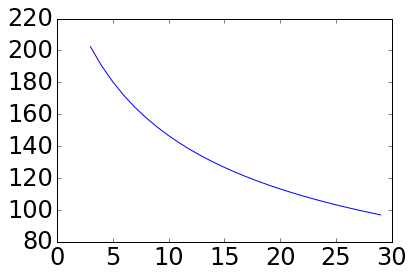

In [69]:
Cd = np.arange(3e-12, 30e-12, 1e-12)
plt.plot(Cd/1e-12, [Colpilt(Qo,L,RB,c,C1,C2,Ya,Yb)[0]/1e6 for c in Cd] )

In [71]:
RL = 18e3
RB = 25e3

Ya = y11 
Yb = y22+1/RL 

# Colpilts
C1 = 9e-12 
C2 = 10e-12 
L  = 80e-9
Qo = 100
Cd = 3e-12

wo,g = Colpilt(Qo,L,RB,Cd,C1,C2,Ya,Yb)


print(g21,-g)
print('fo=',wo/(2*np.pi)/1e6)

0.011999999999999999 0.000304393151217
fo= 32.1981487989


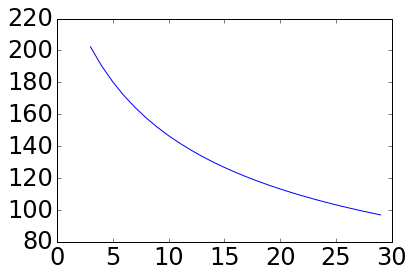

In [72]:
Cd = np.arange(3e-12, 30e-12, 1e-12)
plt.plot(Cd/1e-12, [Colpilt(Qo,L,RB,c,C1,C2,Ya,Yb)[0]/1e6 for c in Cd] )

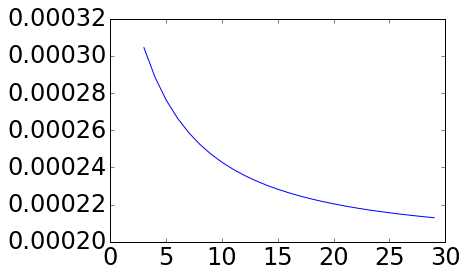

In [75]:
Cd = np.arange(3e-12, 30e-12, 1e-12)
plt.plot(Cd/1e-12, [-Colpilt(Qo,L,RB,c,C1,C2,Ya,Yb)[1] for c in Cd] )